## Tiffle

In [2]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import pandas as pd

## reading

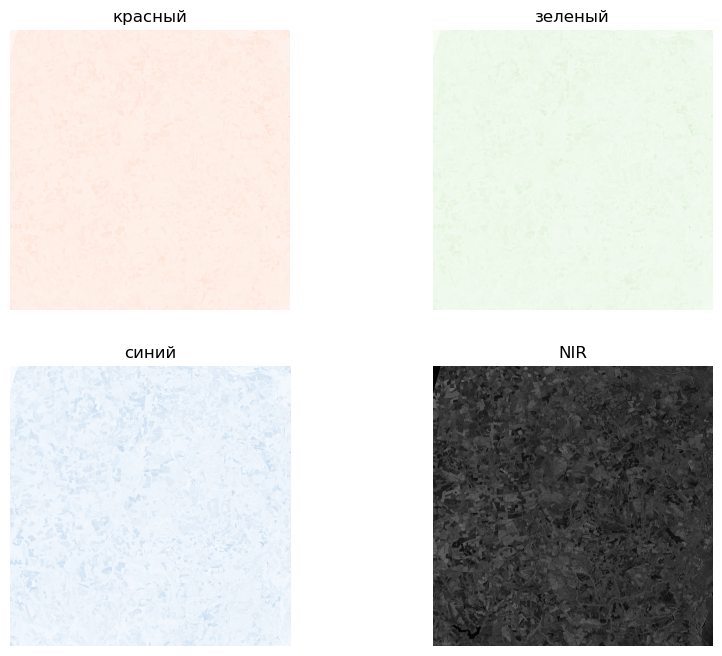

In [2]:
# открытие снимков

import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt
import cv2

def load_multichannel_tiff_image(file_path):
    image = tiff.imread(file_path)
    return image

multichannel_tiff_image_path = '/Users/user/virtualenv/LCT_2024_18/data/Sitronics/1_20/crop_0_1_0000.tif'
multichannel_tiff_image_path = 'res2/output_image_5000.tif'
image_array = load_multichannel_tiff_image(multichannel_tiff_image_path)

if image_array.shape[-1] == 4:
    r_channel = image_array[:, :, 0]
    g_channel = image_array[:, :, 1]
    b_channel = image_array[:, :, 2]
    nir_channel = image_array[:, :, 3]

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title('красный')
plt.imshow(r_channel, cmap='Reds')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('зеленый')
plt.imshow(g_channel, cmap='Greens')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('синий')
plt.imshow(b_channel, cmap='Blues')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('NIR')
plt.imshow(nir_channel, cmap='gray')
plt.axis('off')

plt.show()

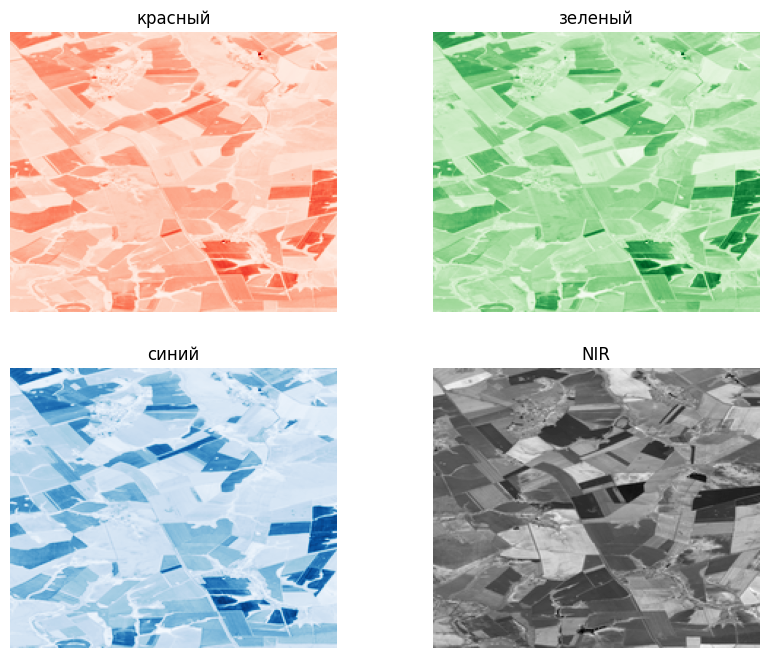

In [11]:
# открытие снимков

import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt
import cv2

def load_multichannel_tiff_image(file_path):
    image = tiff.imread(file_path)
    return image

multichannel_tiff_image_path = '/Users/user/virtualenv/LCT_2024_18/data/Sitronics/1_20/crop_0_1_0000_rgb_fixed.tif'

image_array = load_multichannel_tiff_image(multichannel_tiff_image_path)

if image_array.shape[-1] == 4:
    r_channel = image_array[:, :, 0]
    g_channel = image_array[:, :, 1]
    b_channel = image_array[:, :, 2]
    nir_channel = image_array[:, :, 3]

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title('красный')
plt.imshow(r_channel, cmap='Reds')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('зеленый')
plt.imshow(g_channel, cmap='Greens')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('синий')
plt.imshow(b_channel, cmap='Blues')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('NIR')
plt.imshow(nir_channel, cmap='gray')
plt.axis('off')

plt.show()

# avg mean for dead pixels

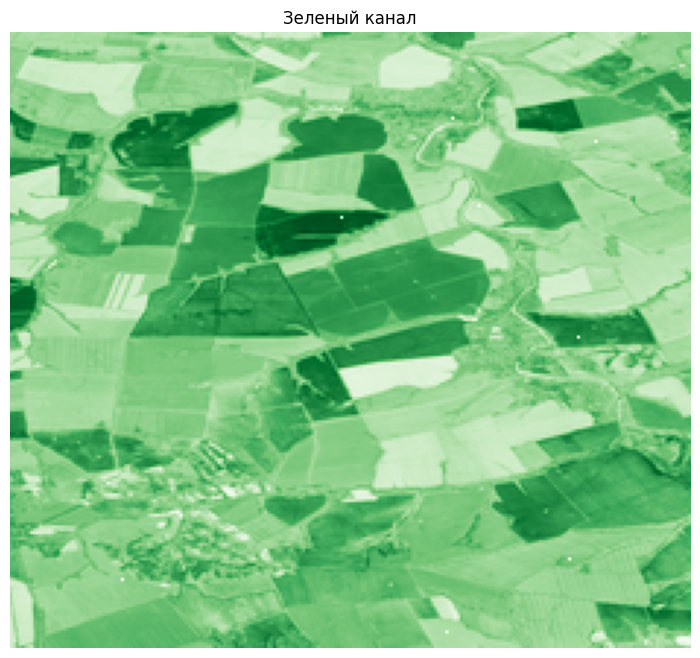

In [12]:
def load_multichannel_tiff_image(file_path):
    image = tiff.imread(file_path)
    return image

def save_channel_as_tiff(channel, file_path):
    """
    Save a single channel as a TIFF file.
    Args:
        channel (numpy array): The channel to save.
        file_path (str): The path where to save the file.
    """
    # Ensure the channel is in a 2D format
    if len(channel.shape) == 2:
        tiff.imwrite(file_path, channel)
    else:
        raise ValueError("Channel should be a 2D array")

multichannel_tiff_image_path = '/Users/user/virtualenv/LCT_2024_18/data/Sitronics/1_20/crop_0_0_0000.tif'

image_array = load_multichannel_tiff_image(multichannel_tiff_image_path)

if image_array.shape[-1] == 4:
    # Extract the green channel
    g_channel = image_array[:, :, 3]

    # Save the green channel as a TIFF file
    green_channel_path = '/Users/user/virtualenv/LCT_2024_18/data/Sitronics/1_20/nir_chanel.tif'
    save_channel_as_tiff(g_channel, green_channel_path)

    # Optional: Display the green channel
    plt.figure(figsize=(10, 8))
    plt.title('Зеленый канал')
    plt.imshow(g_channel, cmap='Greens')
    plt.axis('off')
    plt.show()


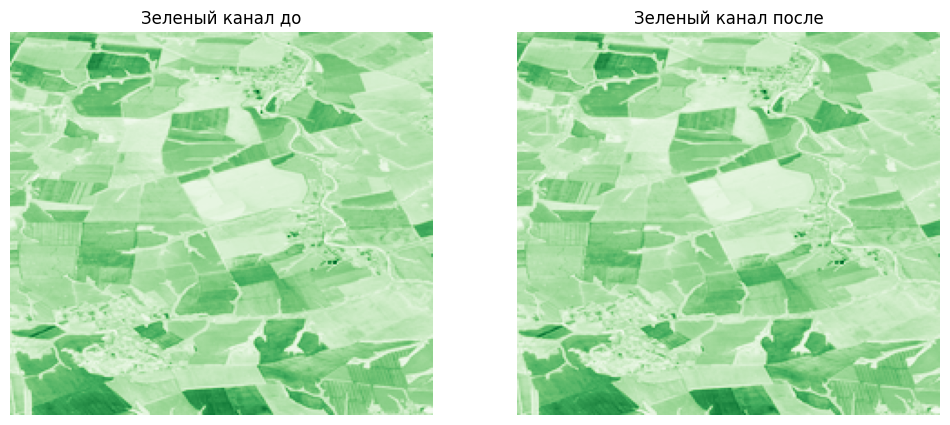

In [13]:
def load_multichannel_tiff_image(file_path):
    image = tiff.imread(file_path)
    return image

def detect_and_fix_dead_pixels(channel, ratio_threshold=5):
    """
    Detect and fix dead pixels in a channel.
    Args:
        channel (numpy array): The channel of the image to process.
        ratio_threshold (float): The ratio threshold to detect dead pixels.
    Returns:
        numpy array: The channel with dead pixels fixed.
    """
    fixed_channel = channel.copy()
    rows, cols = channel.shape

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Extract the 3x3 region
            region = channel[i-1:i+2, j-1:j+2]
            # Calculate the mean of the 8 surrounding pixels
            mean_value = (np.sum(region) - channel[i, j]) / 8.0
            # Check if the central pixel deviates more than the ratio threshold
            if channel[i, j] > mean_value * ratio_threshold or channel[i, j] < mean_value / ratio_threshold:
                fixed_channel[i, j] = mean_value

    return fixed_channel

# Загрузка изображения
multichannel_tiff_image_path = '/Users/user/virtualenv/LCT_2024_18/data/Sitronics/1_20/crop_0_0_0000.tif'
image_array = load_multichannel_tiff_image(multichannel_tiff_image_path)

# Извлечение зеленого канала
if image_array.shape[-1] == 4:
    g_channel = image_array[:, :, 1]

    # Обработка зеленого канала для исправления мертвых пикселей
    g_channel_fixed = detect_and_fix_dead_pixels(g_channel)

    # Отображение зеленого канала до и после исправления
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Зеленый канал до')
    plt.imshow(g_channel, cmap='Greens')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Зеленый канал после')
    plt.imshow(g_channel_fixed, cmap='Greens')
    plt.axis('off')
    plt.show()


# исправление для всех 3 каналов avg mean 3x3

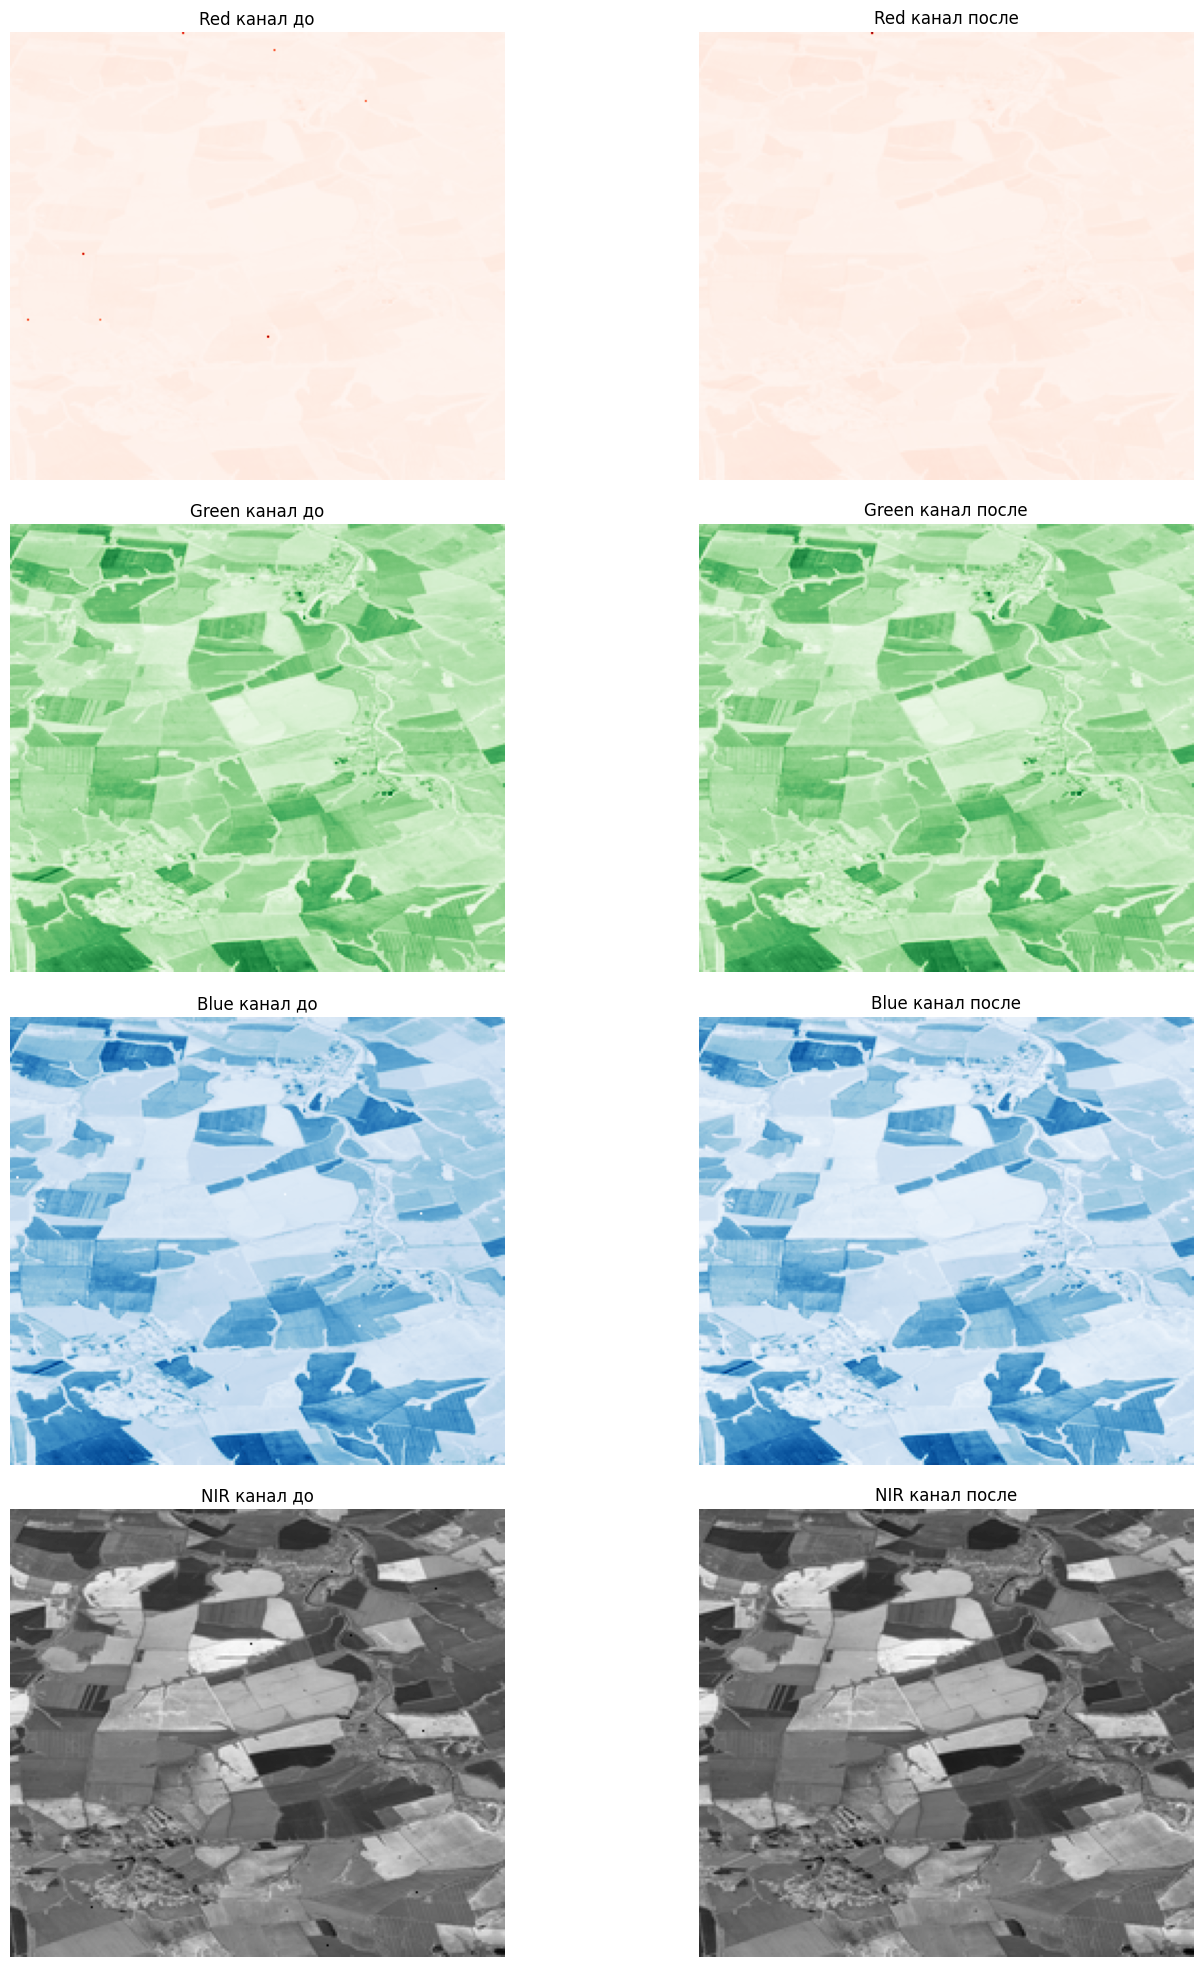

In [20]:
def load_multichannel_tiff_image(file_path):
    """Загружает многоканальное TIFF-изображение."""
    image = tiff.imread(file_path)
    return image

def detect_and_fix_dead_pixels(channel, ratio_threshold=5, percentage_threshold=0.2):
    """
    Обнаруживает и исправляет мертвые пиксели в канале изображения.
    Args:
        channel (numpy array): Канал изображения для обработки.
        ratio_threshold (float): Порог отношения для обнаружения мертвых пикселей.
        percentage_threshold (float): Порог отношения для исправления мертвых пикселей.
    Returns:
        numpy array: Канал с исправленными мертвыми пикселями.
    """
    fixed_channel = channel.copy()
    rows, cols = channel.shape

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Извлекаем регион 3x3
            region = channel[i-1:i+2, j-1:j+2]
            # Считаем среднее значение 8 окружающих пикселей
            mean_value = (np.sum(region) - channel[i, j]) / 8.0
            central_pixel = channel[i, j]

            # Проверка на превышение в 5 раз
            if central_pixel > mean_value * ratio_threshold:
                fixed_channel[i, j] = mean_value

            # Проверка на меньшее значение 15% от среднего
            elif central_pixel < mean_value * percentage_threshold:
                fixed_channel[i, j] = mean_value

    return fixed_channel

def process_and_display_image(file_path):
    """Обрабатывает изображение и отображает каналы до и после исправления мертвых пикселей."""
    # Загрузка изображения
    image_array = load_multichannel_tiff_image(file_path)

    if image_array.shape[-1] == 4:
        channels = ['Red', 'Green', 'Blue', 'NIR']
        cmap_list = ['Reds', 'Greens', 'Blues', 'gray']
        processed_channels = []

        # Обрабатываем каждый канал
        for i, channel_name in enumerate(channels):
            channel = image_array[:, :, i]
            fixed_channel = detect_and_fix_dead_pixels(channel)
            processed_channels.append((channel, fixed_channel, channel_name, cmap_list[i]))

        # Отображаем каналы до и после обработки
        plt.figure(figsize=(16, 25))

        for idx, (orig, fixed, name, cmap) in enumerate(processed_channels):
            plt.subplot(4, 2, idx * 2 + 1)
            plt.title(f'{name} канал до')
            plt.imshow(orig, cmap=cmap)
            plt.axis('off')

            plt.subplot(4, 2, idx * 2 + 2)
            plt.title(f'{name} канал после')
            plt.imshow(fixed, cmap=cmap)
            plt.axis('off')

        plt.subplots_adjust(wspace=0.25, hspace=0.1)
        plt.show()

        # Сохраняем исправленные каналы в многоканальный TIFF-файл
        fixed_image_array = np.stack([fixed_channel for _, fixed_channel, _, _ in processed_channels], axis=-1)
        tiff.imwrite(file_path.replace('.tif', '_fixed.tif'), fixed_image_array.astype(np.uint16))

# Путь к файлу многоканального изображения
multichannel_tiff_image_path = '/Users/user/virtualenv/LCT_2024_18/data/Sitronics/1_20/crop_0_0_0000.tif'
process_and_display_image(multichannel_tiff_image_path)

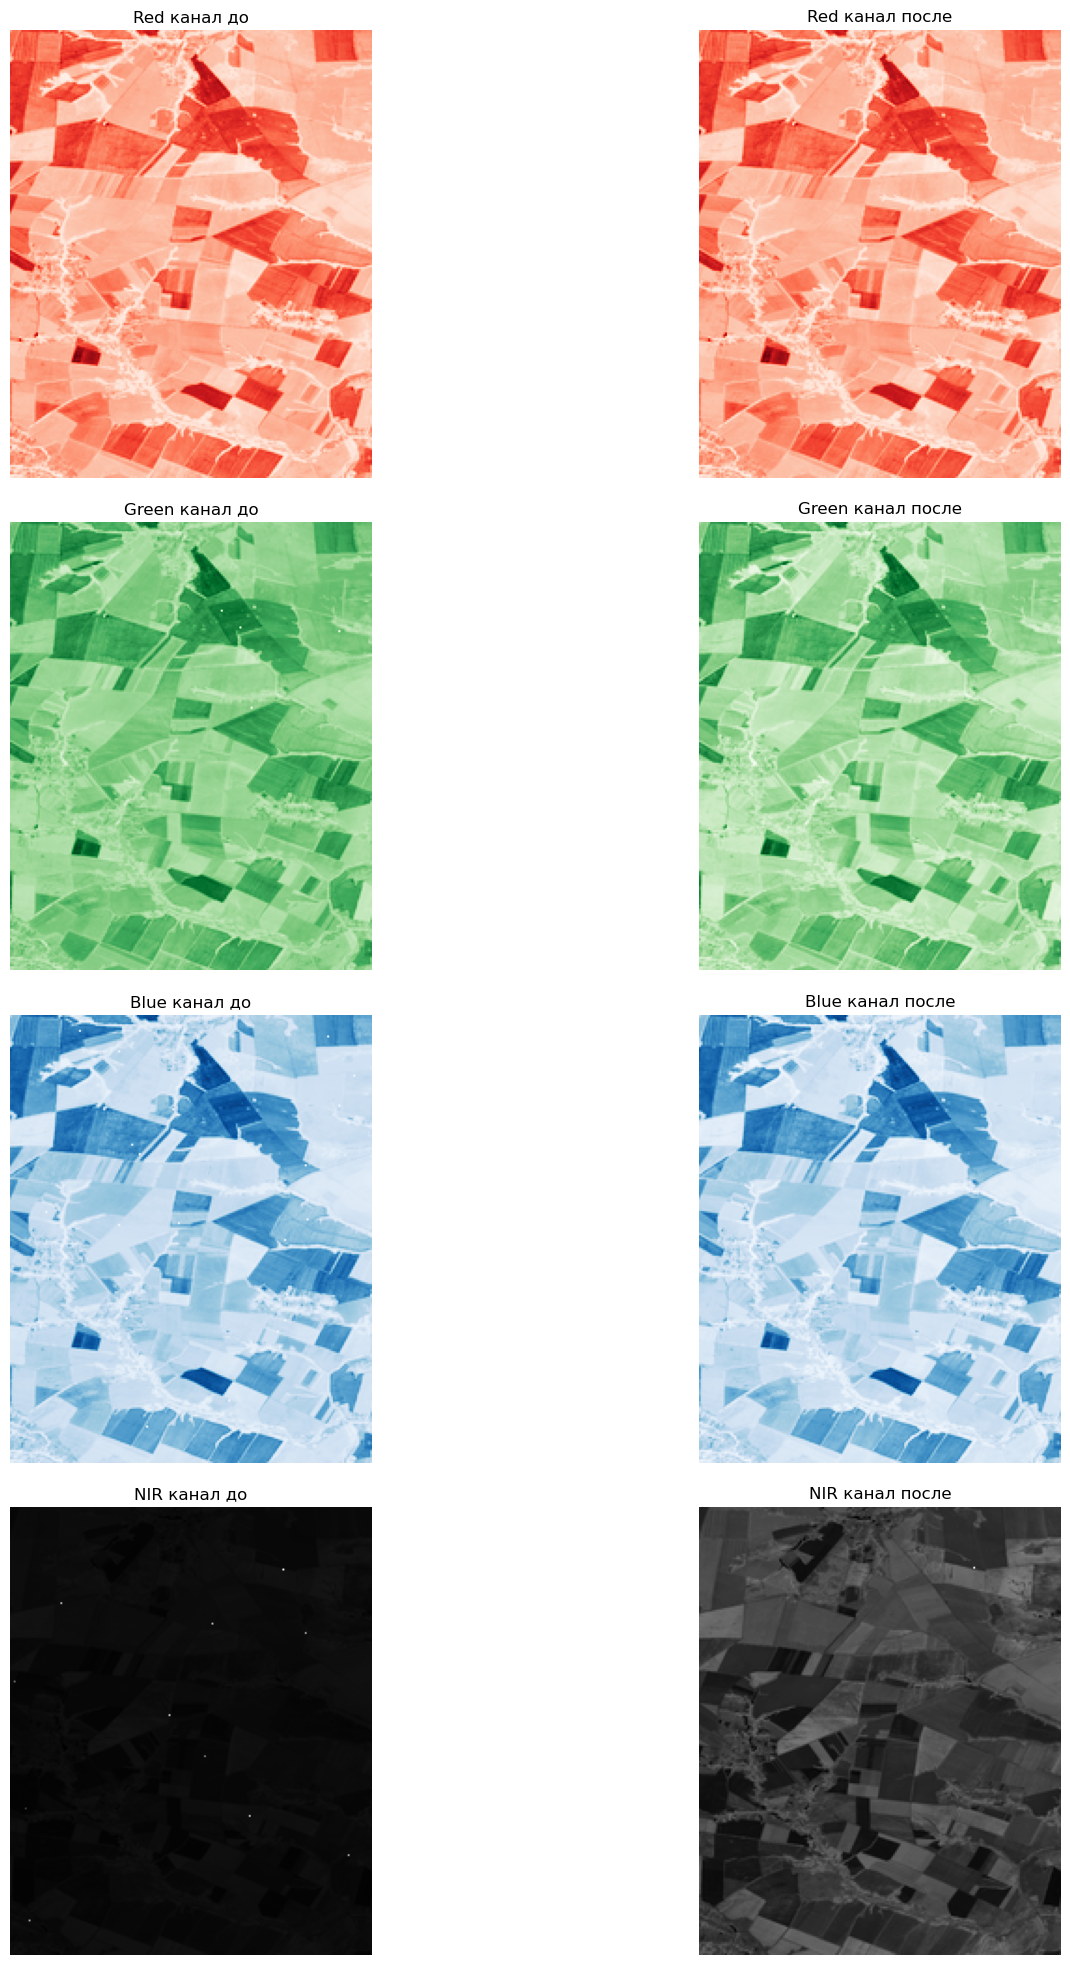

In [29]:

def load_multichannel_tiff_image(file_path):
    """Загружает многоканальное TIFF-изображение."""
    image = tiff.imread(file_path)
    return image

def detect_and_fix_dead_pixels(channel, ratio_threshold=5, percentage_threshold=0.2):
    """
    Обнаруживает и исправляет мертвые пиксели в канале изображения.
    Args:
        channel (numpy array): Канал изображения для обработки.
        ratio_threshold (float): Порог отношения для обнаружения мертвых пикселей.
        percentage_threshold (float): Порог отношения для исправления мертвых пикселей.
    Returns:
        numpy array: Канал с исправленными мертвыми пикселями.
    """
    fixed_channel = channel.copy()
    rows, cols = channel.shape

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Извлекаем регион 3x3
            region = channel[i-1:i+2, j-1:j+2]
            # Считаем среднее значение 8 окружающих пикселей
            mean_value = (np.sum(region) - channel[i, j]) / 8.0
            central_pixel = channel[i, j]

            # Проверка на превышение в 5 раз
            if central_pixel > mean_value * ratio_threshold:
                fixed_channel[i, j] = mean_value

            # Проверка на меньшее значение 15% от среднего
            elif central_pixel < mean_value * percentage_threshold:
                fixed_channel[i, j] = mean_value

    return fixed_channel

def process_and_display_image(file_path):
    """Обрабатывает изображение и отображает каналы до и после исправления мертвых пикселей."""
    # Загрузка изображения
    image_array = load_multichannel_tiff_image(file_path)

    if image_array.shape[-1] == 4:
        channels = ['Red', 'Green', 'Blue', 'NIR']
        cmap_list = ['Reds', 'Greens', 'Blues', 'gray']
        processed_channels = []

        # Обрабатываем каждый канал
        for i, channel_name in enumerate(channels):
            channel = image_array[:, :, i]
            fixed_channel = detect_and_fix_dead_pixels(channel)
            processed_channels.append((channel, fixed_channel, channel_name, cmap_list[i]))

        # Отображаем каналы до и после обработки
        plt.figure(figsize=(16, 25))

        for idx, (orig, fixed, name, cmap) in enumerate(processed_channels):
            plt.subplot(4, 2, idx * 2 + 1)
            plt.title(f'{name} канал до')
            plt.imshow(orig, cmap=cmap)
            plt.axis('off')

            plt.subplot(4, 2, idx * 2 + 2)
            plt.title(f'{name} канал после')
            plt.imshow(fixed, cmap=cmap)
            plt.axis('off')

        plt.subplots_adjust(wspace=0.25, hspace=0.1)
        plt.show()

        # Сохраняем исправленные каналы в многоканальный TIFF-файл
        fixed_image_array = np.stack([fixed_channel for _, fixed_channel, _, _ in processed_channels], axis=-1)
        tiff.imwrite(file_path.replace('.tif', '_fixed.tif'), fixed_image_array.astype(np.uint16))

        # Сохраняем изображение с четырьмя каналами в один TIFF-файл
        four_channel_image_path = file_path.replace('.tif', '_four_channel_fixed.tif')
        tiff.imwrite(four_channel_image_path, fixed_image_array.astype(np.uint16))

# Путь к файлу многоканального изображения
multichannel_tiff_image_path = '../18. Sitronics/1_20/crop_1_0_0000.tif'
process_and_display_image(multichannel_tiff_image_path)


# Исправление по границам картинки с помощью паддинга

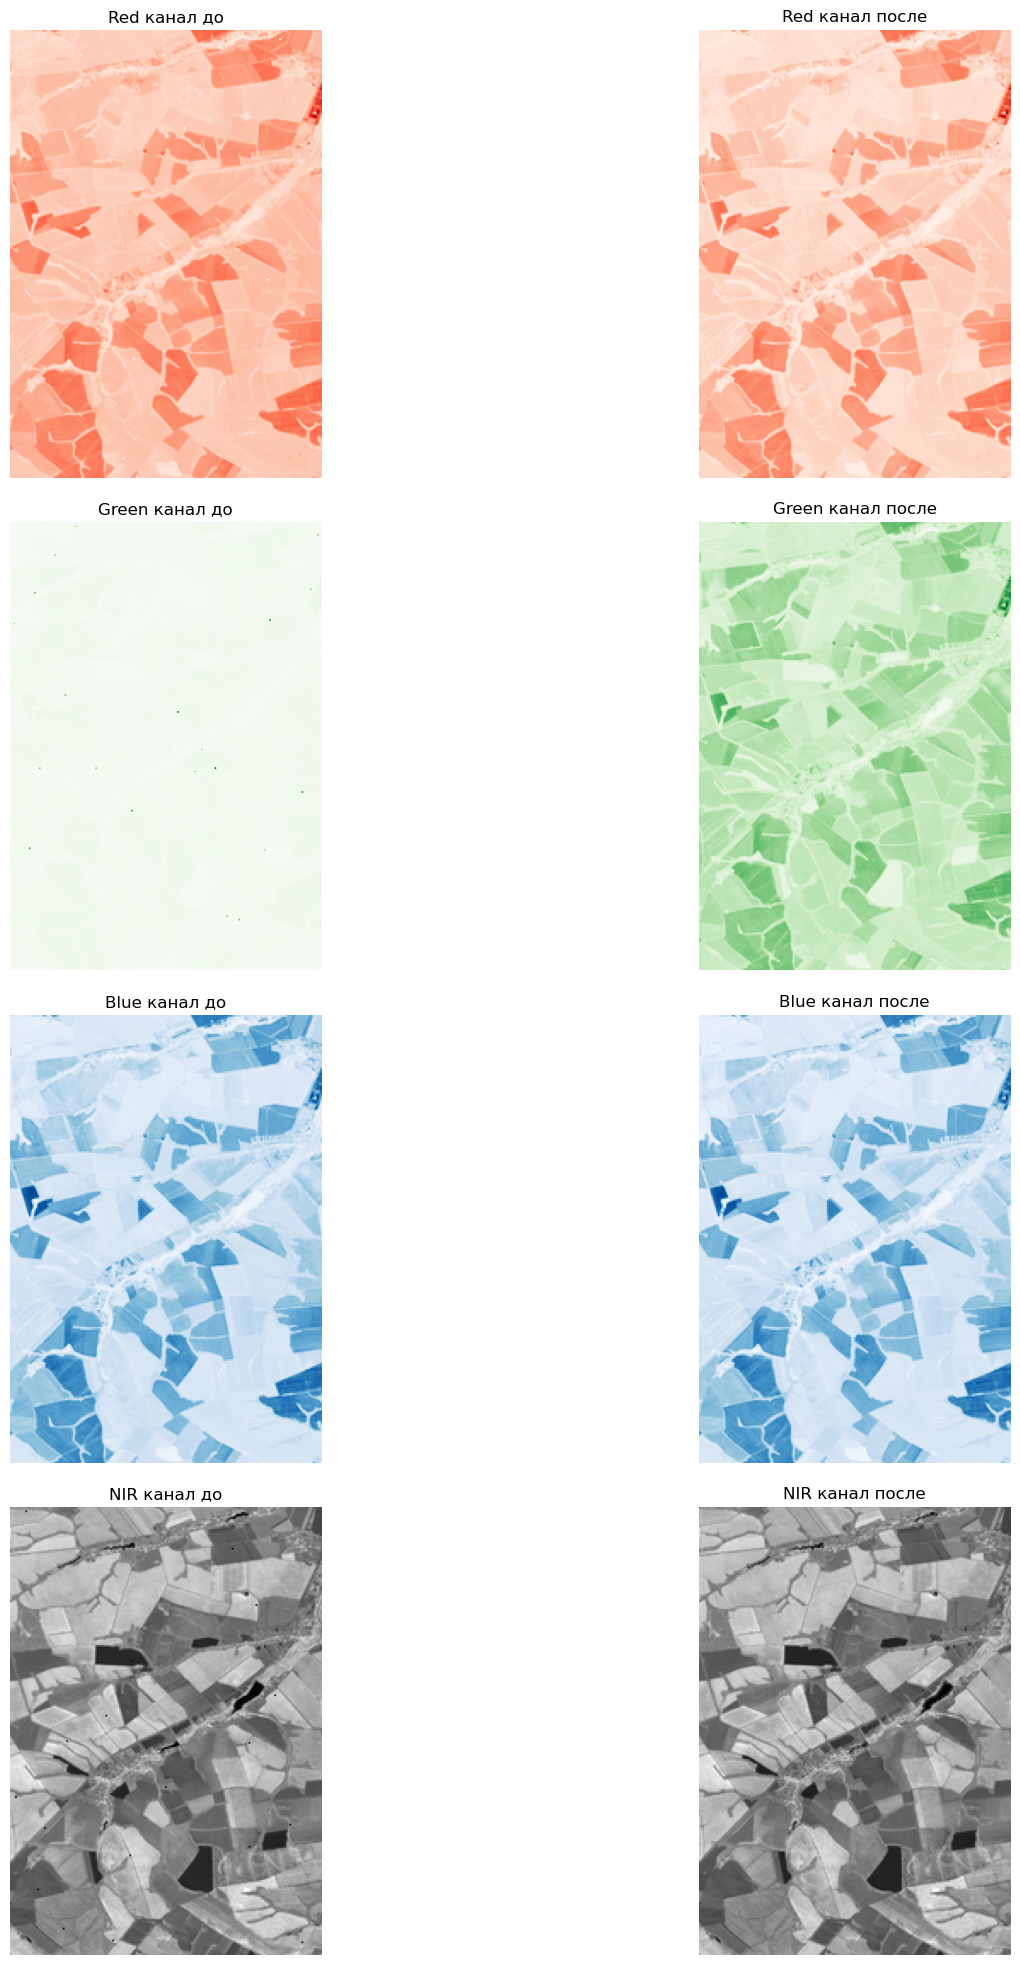

(    номер строки  номер столбца  номер канала  «битое» значение  \
 0              6            159             1                 0   
 1             13              4             1                 0   
 2             15             42             1                 0   
 3             38            112             1                 0   
 4             58            103             1                 0   
 ..           ...            ...           ...               ...   
 94           205             71             4               205   
 95           225             17             4               112   
 96           248             32             4               153   
 97           255             61             4               247   
 98           256            172             4               216   
 
     исправленное значение  номер строки пикселя  номер столбца пикселя  
 0                 981.375                     6                    159  
 1                 392.875        

In [88]:
def load_multichannel_tiff_image(file_path):
    """Загружает многоканальное TIFF-изображение."""
    image = tiff.imread(file_path)
    return image

def detect_and_fix_dead_pixels(channel, channel_number, ratio_threshold=5, percentage_threshold=0.15):
    """
    Обнаруживает и исправляет мертвые пиксели в канале изображения.
    Args:
        channel (numpy array): Канал изображения для обработки.
        channel_number (int): Номер канала для отчета.
        ratio_threshold (float): Порог отношения для обнаружения мертвых пикселей.
        percentage_threshold (float): Порог отношения для исправления мертвых пикселей.
    Returns:
        tuple: Канал с исправленными мертвыми пикселями и отчет.
    """
    fixed_channel = channel.copy()
    rows, cols = channel.shape
    report = []

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Извлекаем регион 3x3
            region = channel[i-1:i+2, j-1:j+2]
            # Считаем среднее значение 8 окружающих пикселей
            mean_value = (np.sum(region) - channel[i, j]) / 8.0
            central_pixel = channel[i, j]

            # Проверка на превышение в 5 раз
            if central_pixel > mean_value * ratio_threshold:
                fixed_channel[i, j] = mean_value
                report.append([i, j, channel_number, central_pixel, mean_value, i, j])

            # Проверка на меньшее значение 15% от среднего
            elif central_pixel < mean_value * percentage_threshold:
                fixed_channel[i, j] = mean_value
                report.append([i, j, channel_number, central_pixel, mean_value, i, j])

    return fixed_channel, report

def detect_and_fix_border_dead_pixels(channel, channel_number, ratio_threshold=5, percentage_threshold=0.15):
    """
    Обнаруживает и исправляет мертвые пиксели на границах канала изображения.
    Args:
        channel (numpy array): Канал изображения для обработки.
        channel_number (int): Номер канала для отчета.
        ratio_threshold (float): Порог отношения для обнаружения мертвых пикселей.
        percentage_threshold (float): Порог отношения для исправления мертвых пикселей.
    Returns:
        tuple: Канал с исправленными мертвыми пикселями и отчет.
    """
    rows, cols = channel.shape
    report = []

    # Верхняя и нижняя границы
    for j in range(cols):
        for i in [0, rows - 1]:
            region = channel[max(0, i-1):min(rows, i+3), max(0, j-1):min(cols, j+3)]
            mean_value = np.mean(region)
            central_pixel = channel[i, j]

            if central_pixel > mean_value * ratio_threshold:
                channel[i, j] = mean_value
                report.append([i, j, channel_number, central_pixel, mean_value, i, j])

            elif central_pixel < mean_value * percentage_threshold:
                channel[i, j] = mean_value
                report.append([i, j, channel_number, central_pixel, mean_value, i, j])

    # Левая и правая границы
    for i in range(rows):
        for j in [0, cols - 1]:
            region = channel[max(0, i-1):min(rows, i+3), max(0, j-1):min(cols, j+3)]
            mean_value = np.mean(region)
            central_pixel = channel[i, j]

            if central_pixel > mean_value * ratio_threshold:
                channel[i, j] = mean_value
                report.append([i, j, channel_number, central_pixel, mean_value, i, j])

            elif central_pixel < mean_value * percentage_threshold:
                channel[i, j] = mean_value
                report.append([i, j, channel_number, central_pixel, mean_value, i, j])

    return channel, report

def apply_custom_padding(channel):
    """
    Применяет паддинг к изображению, используя среднее значение 5 ближайших пикселей.
    """
    rows, cols = channel.shape
    padded_channel = np.zeros((rows + 2, cols + 2), dtype=channel.dtype)

    # Копируем оригинальную матрицу в центр новой матрицы
    padded_channel[1:-1, 1:-1] = channel

    # Верхняя и нижняя границы
    for j in range(cols):
        padded_channel[0, j + 1] = np.mean(channel[0:4, j])  # Верхняя граница
        padded_channel[-1, j + 1] = np.mean(channel[-4:, j])  # Нижняя граница

    # Левая и правая границы
    for i in range(rows):
        padded_channel[i + 1, 0] = np.mean(channel[i, 0:4])  # Левая граница
        padded_channel[i + 1, -1] = np.mean(channel[i, -4:])  # Правая граница

    # Углы
    padded_channel[0, 0] = np.mean(channel[0:4, 0:4])  # Верхний левый угол
    padded_channel[0, -1] = np.mean(channel[0:4, -5:])  # Верхний правый угол
    padded_channel[-1, 0] = np.mean(channel[-4:, 0:4])  # Нижний левый угол
    padded_channel[-1, -1] = np.mean(channel[-4:, -4:])  # Нижний правый угол

    return padded_channel

def save_report_to_csv(report_data, file_path):
    """Сохраняет отчет о исправленных пикселях в файл CSV."""
    df = pd.DataFrame(report_data, columns=[
        'номер строки', 
        'номер столбца', 
        'номер канала', 
        '«битое» значение', 
        'исправленное значение', 
        'номер строки пикселя', 
        'номер столбца пикселя'
    ])
    df.to_csv(file_path, index=False)

def process_and_display_image(file_path):
    """Обрабатывает изображение и отображает каналы до и после исправления мертвых пикселей."""
    # Загрузка изображения
    image_array = load_multichannel_tiff_image(file_path)
    report_data = []

    if image_array.shape[-1] == 4:
        channels = ['Red', 'Green', 'Blue', 'NIR']
        cmap_list = ['Reds', 'Greens', 'Blues', 'gray']
        processed_channels = []

        # Обрабатываем каждый канал
        for i, channel_name in enumerate(channels):
            channel = image_array[:, :, i]
            
            # Применяем кастомный паддинг
            padded_channel = apply_custom_padding(channel)
            
            # Обрабатываем изображение с паддингом
            fixed_padded_channel, channel_report = detect_and_fix_dead_pixels(padded_channel, i + 1)
            
            # Удаляем паддинг
            fixed_channel = fixed_padded_channel[1:-1, 1:-1]
            
            # Обрабатываем границы
            fixed_channel, border_report = detect_and_fix_border_dead_pixels(fixed_channel, i + 1)
            
            # Добавляем отчет
            report_data.extend(channel_report)
            report_data.extend(border_report)
            
            processed_channels.append((channel, fixed_channel, channel_name, cmap_list[i]))

        # Отображаем каналы до и после обработки
        plt.figure(figsize=(16, 25))

        for idx, (orig, fixed, name, cmap) in enumerate(processed_channels):
            plt.subplot(4, 2, idx * 2 + 1)
            plt.title(f'{name} канал до')
            plt.imshow(orig, cmap=cmap)
            plt.axis('off')

            plt.subplot(4, 2, idx * 2 + 2)
            plt.title(f'{name} канал после')
            plt.imshow(fixed, cmap=cmap)
            plt.axis('off')

        plt.subplots_adjust(wspace=0.25, hspace=0.1)
        plt.show()

        # Сохраняем исправленные каналы в многоканальный TIFF-файл
        fixed_image_array = np.stack([fixed_channel for _, fixed_channel, _, _ in processed_channels], axis=-1)
        tiff.imwrite(file_path.replace('.tif', '_fixed.tif'), fixed_image_array.astype(np.uint16))

        # Создаем суммарное изображение RGB
        rgb_image_fixed = np.stack(
            [processed_channels[0][1], processed_channels[1][1], processed_channels[2][1],processed_channels[3][1]], 
            axis=-1
        )
        rgb_image_fixed_path = file_path.replace('.tif', '_rgbnir_fixed.tif')
        tiff.imwrite(rgb_image_fixed_path, rgb_image_fixed.astype(np.uint16))

        # Сохраняем отчет в формате CSV
        report_path = file_path.replace('.tif', '_report.csv')
        save_report_to_csv(report_data, report_path)

        # Выводим DataFrame
        df = pd.DataFrame(report_data, columns=[
            'номер строки', 
            'номер столбца', 
            'номер канала', 
            '«битое» значение', 
            'исправленное значение', 
            'номер строки пикселя', 
            'номер столбца пикселя'
        ])
        return df,fixed_image_array

# Путь к файлу многоканального изображения
multichannel_tiff_image_path = '../18. Sitronics/1_20/crop_3_2_0000.tif'
process_and_display_image(multichannel_tiff_image_path)

## Продовый вариант с настраиваемым паддингом без показа картинки и записи локально отчета (только передача массива +df)

In [50]:
import numpy as np
import tifffile as tiff
import pandas as pd

def load_multichannel_tiff_image(file_path):
    """Загружает многоканальное TIFF-изображение."""
    image = tiff.imread(file_path)
    return image

def detect_and_fix_dead_pixels(channel, channel_number, ratio_threshold=5, percentage_threshold=0.15):
    """Детектирование "битых" пикселей и замени их значений по периметру (rows-1), (columns-1) кропа."""
    fixed_channel = channel.copy()
    rows, cols = channel.shape
    report = []

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            region = channel[i-1:i+2, j-1:j+2]
            mean_value = (np.sum(region) - channel[i, j]) / 8.0
            central_pixel = channel[i, j]

            if central_pixel > mean_value * ratio_threshold:
                fixed_channel[i, j] = mean_value
                report.append([i, j, channel_number, central_pixel, mean_value])

            elif central_pixel < mean_value * percentage_threshold:
                fixed_channel[i, j] = mean_value
                report.append([i, j, channel_number, central_pixel, mean_value])

    return fixed_channel, report

def detect_and_fix_border_dead_pixels(channel, channel_number, ratio_threshold=5, percentage_threshold=0.15):
    """Детектирование "битых" пикселей и замени их значений по внешней границе кропа."""
    rows, cols = channel.shape
    report = []

    for j in range(cols):
        for i in [0, rows - 1]:
            region = channel[max(0, i-1):min(rows, i+3), max(0, j-1):min(cols, j+3)]
            mean_value = np.mean(region)
            central_pixel = channel[i, j]

            if central_pixel > mean_value * ratio_threshold:
                channel[i, j] = mean_value
                report.append([i, j, channel_number, central_pixel, mean_value])

            elif central_pixel < mean_value * percentage_threshold:
                channel[i, j] = mean_value
                report.append([i, j, channel_number, central_pixel, mean_value])

    for i in range(rows):
        for j in [0, cols - 1]:
            region = channel[max(0, i-1):min(rows, i+3), max(0, j-1):min(cols, j+3)]
            mean_value = np.mean(region)
            central_pixel = channel[i, j]

            if central_pixel > mean_value * ratio_threshold:
                channel[i, j] = mean_value
                report.append([i, j, channel_number, central_pixel, mean_value])

            elif central_pixel < mean_value * percentage_threshold:
                channel[i, j] = mean_value
                report.append([i, j, channel_number, central_pixel, mean_value])

    return channel, report

def apply_custom_padding(channel):
    """Введение кастомного паддинга для последующей обработки границы пикселей кропа."""
    rows, cols = channel.shape
    padded_channel = np.zeros((rows + 2, cols + 2), dtype=channel.dtype)
    padded_channel[1:-1, 1:-1] = channel

    for j in range(cols):
        padded_channel[0, j + 1] = np.mean(channel[0:4, j])
        padded_channel[-1, j + 1] = np.mean(channel[-4:, j])

    for i in range(rows):
        padded_channel[i + 1, 0] = np.mean(channel[i, 0:4])
        padded_channel[i + 1, -1] = np.mean(channel[i, -4:])

    padded_channel[0, 0] = np.mean(channel[0:4, 0:4])
    padded_channel[0, -1] = np.mean(channel[0:4, -4:])
    padded_channel[-1, 0] = np.mean(channel[-4:, 0:4])
    padded_channel[-1, -1] = np.mean(channel[-4:, -4:])

    return padded_channel

def save_report_to_csv(report_data, file_path):
    """Сохранение отчета о "битых" пикселях в виде таблицы."""
    df = pd.DataFrame(report_data, columns=[
        'номер строки',
        'номер столбца',
        'номер канала',
        '«битое» значение',
        'исправленное значение'
    ])
    df.to_csv(file_path, index=False)

def process_and_display_image(file_path, ratio_threshold=5, percentage_threshold=0.15):
    """Обработка кропа с "битыми" пикселями и возвращение "исправленного" кропа с информацией о исправлениях."""
    image_array = load_multichannel_tiff_image(file_path)
    report_data = []

    if image_array.shape[-1] == 4:
        channels = ['Red', 'Green', 'Blue', 'NIR']
        cmap_list = ['Reds', 'Greens', 'Blues', 'gray']
        processed_channels = []

        for i, channel_name in enumerate(channels):
            channel = image_array[:, :, i]
            padded_channel = apply_custom_padding(channel)
            (fixed_padded_channel,
             channel_report) = detect_and_fix_dead_pixels(padded_channel, i + 1, ratio_threshold,
                                                          percentage_threshold)
            fixed_channel = fixed_padded_channel[1:-1, 1:-1]
            (fixed_channel,
             border_report) = detect_and_fix_border_dead_pixels(fixed_channel, i + 1, ratio_threshold,
                                                                percentage_threshold)
            report_data.extend(channel_report)
            report_data.extend(border_report)
            processed_channels.append((channel, fixed_channel, channel_name, cmap_list[i]))

        fixed_image_array = np.stack([fixed_channel for _, fixed_channel, _, _ in processed_channels], axis=-1)
        #rgb_image_fixed_path = file_path.replace('.tif', '_rgbnir_fixed.tif') # отвечает за сохранение исправленного кропа в формате tiff
        #tiff.imwrite(rgb_image_fixed_path, rgb_image_fixed.astype(np.uint16))
        #report_path = file_path.replace('.tif', '_dead_pixels_report.csv') # отвечает за сохранение отчета о "битых" пикселях и их координатах
        #save_report_to_csv(report_data, report_path)
        df = pd.DataFrame(report_data, columns=[
            'номер строки',
            'номер столбца',
            'номер канала',
            '«битое» значение',
            'исправленное значение'
        ])
        return df, fixed_image_array

"""Пример вызова функции."""
#multichannel_tiff_image_path = '../18. Sitronics/1_20/crop_1_0_0000.tif'
#process_and_display_image(multichannel_tiff_image_path)


multichannel_tiff_image_path = '../18. Sitronics/1_20/crop_2_0_0000.tif'
process_and_display_image(multichannel_tiff_image_path)


(    номер строки  номер столбца  номер канала  «битое» значение  \
 0             29            166             2               138   
 1             31             85             2                83   
 2             52             38             2                99   
 3             54             35             2                96   
 4             98             96             2               110   
 ..           ...            ...           ...               ...   
 82           137             49             4             14265   
 83           150            205             4               189   
 84           156             49             4                74   
 85           157             49             4                81   
 86           171             36             4             15831   
 
     исправленное значение  
 0                1109.500  
 1                 631.375  
 2                 700.875  
 3                 745.625  
 4                1060.125  
 ..     

## паддинг с режимом edge

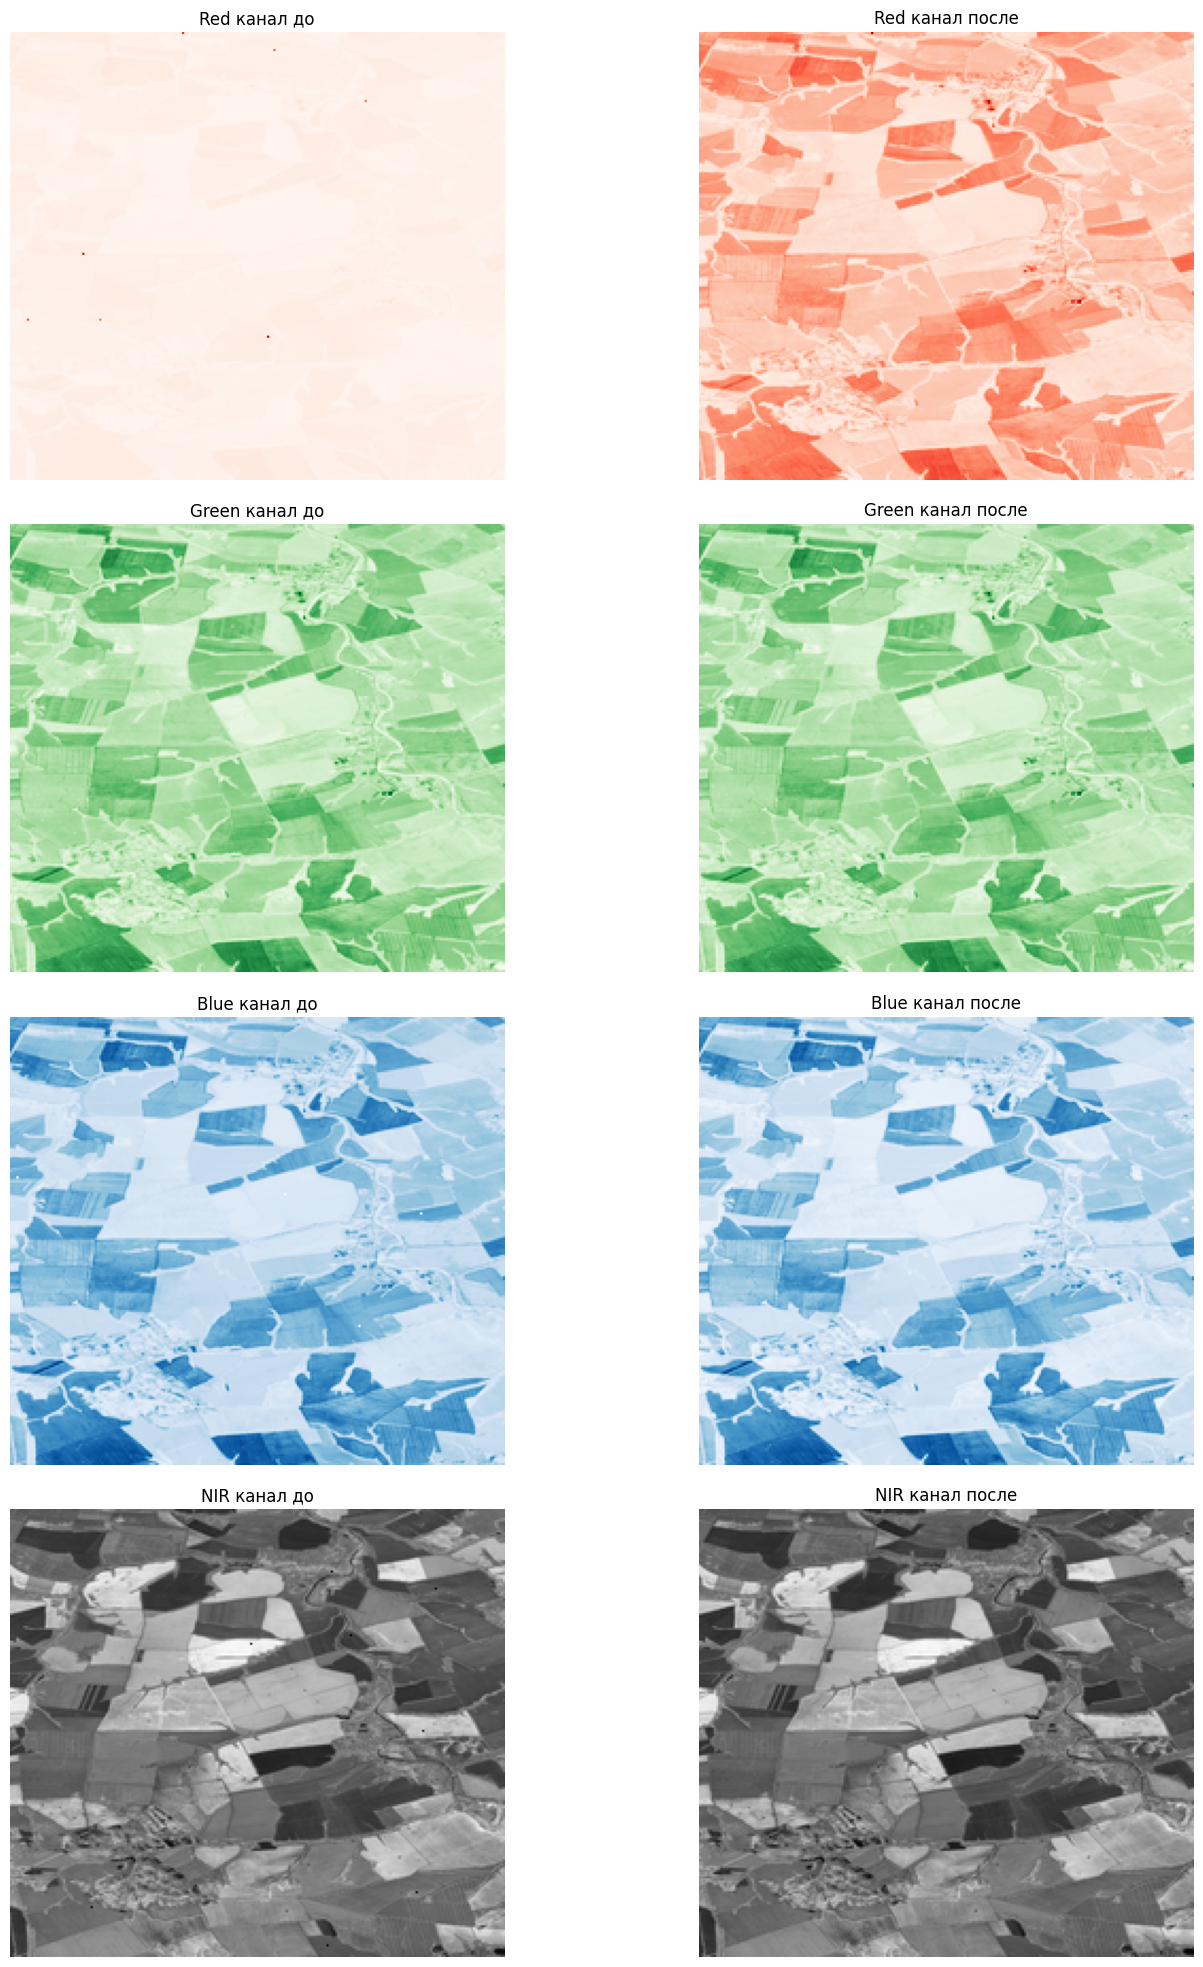

In [16]:
def load_multichannel_tiff_image(file_path):
    """Загружает многоканальное TIFF-изображение."""
    image = tiff.imread(file_path)
    return image

def detect_and_fix_dead_pixels(channel, ratio_threshold=5, percentage_threshold=0.2):
    """
    Обнаруживает и исправляет мертвые пиксели в канале изображения.
    Args:
        channel (numpy array): Канал изображения для обработки.
        ratio_threshold (float): Порог отношения для обнаружения мертвых пикселей.
        percentage_threshold (float): Порог отношения для исправления мертвых пикселей.
    Returns:
        numpy array: Канал с исправленными мертвыми пикселями.
    """
    fixed_channel = channel.copy()
    rows, cols = channel.shape

    # Добавляем паддинг с модом 'edge'
    padded_channel = np.pad(channel, pad_width=1, mode='edge')

    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            # Извлекаем регион 3x3
            region = padded_channel[i-1:i+2, j-1:j+2]
            # Считаем среднее значение 8 окружающих пикселей
            mean_value = (np.sum(region) - padded_channel[i, j]) / 8.0
            central_pixel = padded_channel[i, j]

            # Проверка на превышение в 5 раз
            if central_pixel > mean_value * ratio_threshold:
                fixed_channel[i-1, j-1] = mean_value

            # Проверка на меньшее значение 20% от среднего
            elif central_pixel < mean_value * percentage_threshold:
                fixed_channel[i-1, j-1] = mean_value

    return fixed_channel

def process_and_display_image(file_path):
    """Обрабатывает изображение и отображает каналы до и после исправления мертвых пикселей."""
    # Загрузка изображения
    image_array = load_multichannel_tiff_image(file_path)

    if image_array.shape[-1] == 4:
        channels = ['Red', 'Green', 'Blue', 'NIR']
        cmap_list = ['Reds', 'Greens', 'Blues', 'gray']
        processed_channels = []

        # Обрабатываем каждый канал
        for i, channel_name in enumerate(channels):
            channel = image_array[:, :, i]
            fixed_channel = detect_and_fix_dead_pixels(channel)
            processed_channels.append((channel, fixed_channel, channel_name, cmap_list[i]))

        # Отображаем каналы до и после обработки
        plt.figure(figsize=(16, 25))

        for idx, (orig, fixed, name, cmap) in enumerate(processed_channels):
            plt.subplot(4, 2, idx * 2 + 1)
            plt.title(f'{name} канал до')
            plt.imshow(orig, cmap=cmap)
            plt.axis('off')

            plt.subplot(4, 2, idx * 2 + 2)
            plt.title(f'{name} канал после')
            plt.imshow(fixed, cmap=cmap)
            plt.axis('off')

        plt.subplots_adjust(wspace=0.25, hspace=0.1)
        plt.show()

        # Сохраняем исправленные каналы в многоканальный TIFF-файл
        fixed_image_array = np.stack([fixed_channel for _, fixed_channel, _, _ in processed_channels], axis=-1)
        tiff.imwrite(file_path.replace('.tif', '_fixed.tif'), fixed_image_array.astype(np.uint16))

        # Сохраняем RGB изображение
        rgb_image_path = file_path.replace('.tif', '_rgb_fixed.tif')
        rgb_image = np.stack([processed_channels[0][1], processed_channels[1][1], processed_channels[2][1]], axis=-1)
        tiff.imwrite(rgb_image_path, rgb_image.astype(np.uint16))

# Путь к файлу многоканального изображения
multichannel_tiff_image_path = '/Users/user/virtualenv/LCT_2024_18/data/Sitronics/1_20/crop_0_0_0000.tif'
process_and_display_image(multichannel_tiff_image_path)



Исправленные пиксели в Red канале:
Координаты: (0, 81), оригинальное значение: 9403, исправленное значение: 1697.625
Координаты: (8, 124), оригинальное значение: 7613, исправленное значение: 575.5
Координаты: (32, 167), оригинальное значение: 7099, исправленное значение: 546.875
Координаты: (104, 34), оригинальное значение: 10825, исправленное значение: 703.25
Координаты: (135, 8), оригинальное значение: 8156, исправленное значение: 549.25
Координаты: (135, 42), оригинальное значение: 6410, исправленное значение: 567.875
Координаты: (143, 121), оригинальное значение: 12131, исправленное значение: 832.625

Исправленные пиксели в Blue канале:
Координаты: (75, 3), оригинальное значение: 0, исправленное значение: 1154.875
Координаты: (83, 129), оригинальное значение: 0, исправленное значение: 348.875
Координаты: (92, 193), оригинальное значение: 0, исправленное значение: 1363.25
Координаты: (145, 164), оригинальное значение: 0, исправленное значение: 1134.625
Координаты: (184, 197), ориги

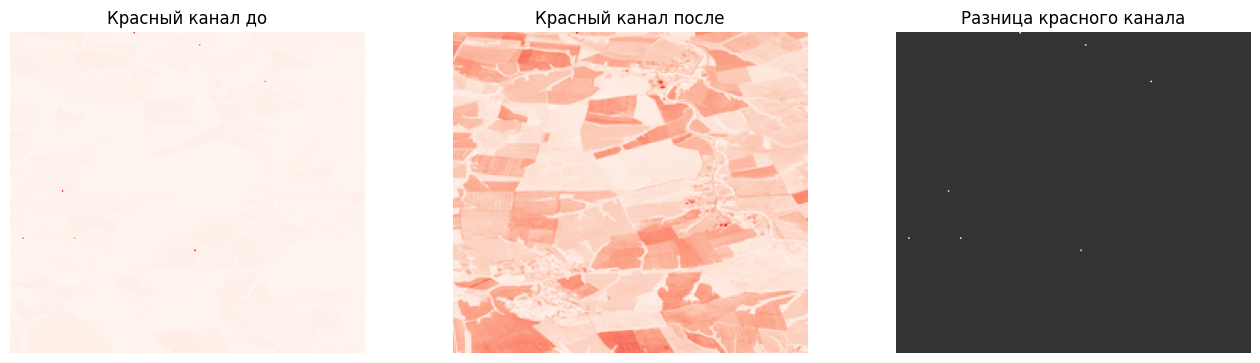


Количество измененных пикселей в красном канале: 7


In [23]:
def load_multichannel_tiff_image(file_path):
    """Загружает многоканальное TIFF-изображение."""
    image = tiff.imread(file_path)
    return image

def detect_and_fix_dead_pixels(channel, ratio_threshold=5, percentage_threshold=0.2):
    """
    Обнаруживает и исправляет мертвые пиксели в канале изображения.
    Args:
        channel (numpy array): Канал изображения для обработки.
        ratio_threshold (float): Порог отношения для обнаружения мертвых пикселей.
        percentage_threshold (float): Порог отношения для исправления мертвых пикселей.
    Returns:
        numpy array: Канал с исправленными мертвыми пикселями.
    """
    fixed_channel = channel.copy()
    rows, cols = channel.shape

    # Добавляем паддинг с модом 'edge'
    padded_channel = np.pad(channel, pad_width=1, mode='edge')

    corrected_pixels = []

    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            # Извлекаем регион 3x3
            region = padded_channel[i-1:i+2, j-1:j+2]
            # Считаем среднее значение 8 окружающих пикселей
            mean_value = (np.sum(region) - padded_channel[i, j]) / 8.0
            central_pixel = padded_channel[i, j]

            # Проверка на превышение в 5 раз
            if central_pixel > mean_value * ratio_threshold:
                fixed_channel[i-1, j-1] = mean_value
                corrected_pixels.append(((i-1, j-1), central_pixel, mean_value))

            # Проверка на меньшее значение 20% от среднего
            elif central_pixel < mean_value * percentage_threshold:
                fixed_channel[i-1, j-1] = mean_value
                corrected_pixels.append(((i-1, j-1), central_pixel, mean_value))

    return fixed_channel, corrected_pixels

def compare_channels(channel_before, channel_after):
    """
    Сравнивает два канала попиксельно и возвращает массив разницы и количество изменений.
    Args:
        channel_before (numpy array): Канал до обработки.
        channel_after (numpy array): Канал после обработки.
    Returns:
        numpy array: Массив разницы.
        int: Количество измененных пикселей.
    """
    difference = channel_after - channel_before
    changed_pixels = np.count_nonzero(difference)
    return difference, changed_pixels

def process_and_display_image(file_path, alpha=1.0):
    """
    Обрабатывает изображение и отображает каналы до и после исправления мертвых пикселей.
    Args:
        file_path (str): Путь к TIFF-изображению.
        alpha (float): Прозрачность для отображения каналов. Значение должно быть от 0.0 до 1.0.
    """
    # Загрузка изображения
    image_array = load_multichannel_tiff_image(file_path)

    if image_array.shape[-1] == 4:
        channels = ['Red', 'Green', 'Blue', 'NIR']
        cmap_list = ['Reds', 'Greens', 'Blues', 'gray']
        processed_channels = []

        # Обрабатываем каждый канал
        for i, channel_name in enumerate(channels):
            channel = image_array[:, :, i]
            fixed_channel, corrected_pixels = detect_and_fix_dead_pixels(channel)
            processed_channels.append((channel, fixed_channel, channel_name, cmap_list[i]))

            # Выводим информацию об исправленных пикселях
            if corrected_pixels:
                print(f"\nИсправленные пиксели в {channel_name} канале:")
                for (coord, original_value, fixed_value) in corrected_pixels:
                    print(f"Координаты: {coord}, оригинальное значение: {original_value}, исправленное значение: {fixed_value}")

        # Сравнение красного канала до и после
        red_channel_before = processed_channels[0][0]
        red_channel_after = processed_channels[0][1]
        red_diff, red_changed_pixels = compare_channels(red_channel_before, red_channel_after)

        # Отображение сравнения красного канала
        plt.figure(figsize=(16, 8))

        plt.subplot(1, 3, 1)
        plt.title('Красный канал до')
        plt.imshow(red_channel_before, cmap='Reds', alpha=alpha)
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.title('Красный канал после')
        plt.imshow(red_channel_after, cmap='Reds', alpha=alpha)
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title('Разница красного канала')
        plt.imshow(np.abs(red_diff), cmap='gray', alpha=alpha)
        plt.axis('off')

        plt.subplots_adjust(wspace=0.25, hspace=0.1)
        plt.show()

        print(f"\nКоличество измененных пикселей в красном канале: {red_changed_pixels}")

        # Сохраняем исправленные каналы в многоканальный TIFF-файл
        fixed_image_array = np.stack([fixed_channel for _, fixed_channel, _, _ in processed_channels], axis=-1)
        tiff.imwrite(file_path.replace('.tif', '_fixed.tif'), fixed_image_array.astype(np.uint16))

        # Сохраняем RGB изображение
        rgb_image_path = file_path.replace('.tif', '_rgb_fixed.tif')
        rgb_image = np.stack([processed_channels[0][1], processed_channels[1][1], processed_channels[2][1]], axis=-1)
        tiff.imwrite(rgb_image_path, rgb_image.astype(np.uint16))

# Путь к файлу многоканального изображения
multichannel_tiff_image_path = '/Users/user/virtualenv/LCT_2024_18/data/Sitronics/1_20/crop_0_0_0000.tif'
# Указываем альфа-канал (прозрачность)
process_and_display_image(multichannel_tiff_image_path, alpha=0.8)
